In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
import string
import unicodedata
import seaborn as sns

# from unidecode import unidecode


# Original Raw Data

In [2]:
data = pd.read_csv('dataset/train.csv')
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

### Drop Columns

In [5]:
data = data.drop(['obscene',"threat","insult",'identity_hate'], axis=1) 
data

144277
15294


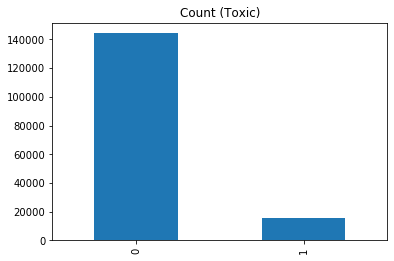

In [6]:
toxic_count = data.toxic.value_counts()
print((data['toxic'] == 0).sum())
print((data['toxic'] == 1).sum())
toxic_count.plot(kind='bar', title='Count (Toxic)')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            159571 non-null  object
 1   comment_text  159571 non-null  object
 2   toxic         159571 non-null  int64 
 3   severe_toxic  159571 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


### Get only 20k samples

In [58]:
# new_data = data.sample(n = 20000)
# new_data

id                                       comment_text  \
2646    071745e3eb03538e  Ooh, I guess I hit a sore spot. You realized y...   
104274  2dfdab62962d5180  That separate article doesn't change a thing. ...   
70270   bbfd3f3fd18094b7  Change importance as proper. User:Ruud Koot is...   
24307   402a544396fd887a  Welcome!\n\nHello, , and welcome to Wikipedia!...   
138842  e6f4c4014025ef62            Do not tell me what to do, you shitbag.   
...                  ...                                                ...   
116736  700f46f90d2e340e  "\nI see. Well, no, the ""oldest attestation o...   
11682   1ee10cd8e499f3d4  Vandalism \n\nLose a delete argument, wait for...   
86852   e84da31727aff2ed  "\nI'm sorry to see the way this has turned ou...   
64495   ac989b131ac71538             Ah, so it should be assessed as start.   
114342  639367ef585e8aed  Help with Danish things \n\nI am currently wor...   

        toxic  severe_toxic  
2646        1             0  
104274      0             0  
70270       0             0  
24307       0             0  
138842      1             0  
...       ...           ...  
116736      0             0  
11682       0             0  
86852       0             0  
64495       0             0  
114342      0             0  

[20000 rows x 4 columns]

Save to data to new csv

In [11]:
# new_data.to_csv('dataset/new_data.csv',index=False)

In [59]:
# new_data

id                                       comment_text  \
2646    071745e3eb03538e  Ooh, I guess I hit a sore spot. You realized y...   
104274  2dfdab62962d5180  That separate article doesn't change a thing. ...   
70270   bbfd3f3fd18094b7  Change importance as proper. User:Ruud Koot is...   
24307   402a544396fd887a  Welcome!\n\nHello, , and welcome to Wikipedia!...   
138842  e6f4c4014025ef62            Do not tell me what to do, you shitbag.   
...                  ...                                                ...   
116736  700f46f90d2e340e  "\nI see. Well, no, the ""oldest attestation o...   
11682   1ee10cd8e499f3d4  Vandalism \n\nLose a delete argument, wait for...   
86852   e84da31727aff2ed  "\nI'm sorry to see the way this has turned ou...   
64495   ac989b131ac71538             Ah, so it should be assessed as start.   
114342  639367ef585e8aed  Help with Danish things \n\nI am currently wor...   

        toxic  severe_toxic  
2646        1             0  
104274      0             0  
70270       0             0  
24307       0             0  
138842      1             0  
...       ...           ...  
116736      0             0  
11682       0             0  
86852       0             0  
64495       0             0  
114342      0             0  

[20000 rows x 4 columns]

In [8]:
# new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 24036 to 49480
Data columns (total 4 columns):
id              40000 non-null object
comment_text    40000 non-null object
toxic           40000 non-null int64
severe_toxic    40000 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


### Check for any duplicates

In [8]:
# replace empty cell with NaN value
data = data.replace(r'^\s*$', np.NaN, regex=True)
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  
...       ...           ...  
159566      0             0  
159567      0             0  
159568      0             0  
159569      0             0  
159570      0             0  

[159571 rows x 4 columns]

In [9]:
#find for duplicate rows (if any)
data[['id','comment_text']].duplicated().sum()

0

### Count number of text in each comment

In [10]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words))

data['count'] = data['comment_text'].apply(lambda x: avg_word(x))
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  count  
0             0    222  
1             0     95  
2             0    192  
3             0    507  
4             0     55

In [11]:
data.describe()

toxic   severe_toxic          count
count  159571.000000  159571.000000  159571.000000
mean        0.095844       0.009996     324.644791
std         0.294379       0.099477     488.555100
min         0.000000       0.000000       5.000000
25%         0.000000       0.000000      79.000000
50%         0.000000       0.000000     169.000000
75%         0.000000       0.000000     358.000000
max         1.000000       1.000000    4965.000000

### Basic count of toxidity

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


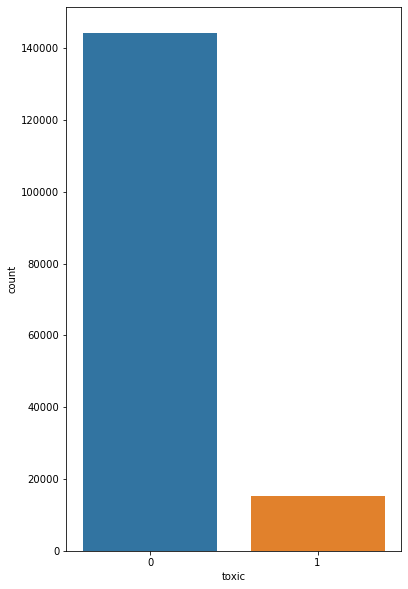

In [12]:
#toxic
plt.figure(figsize=(6, 10))
sns.countplot(data['toxic'])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


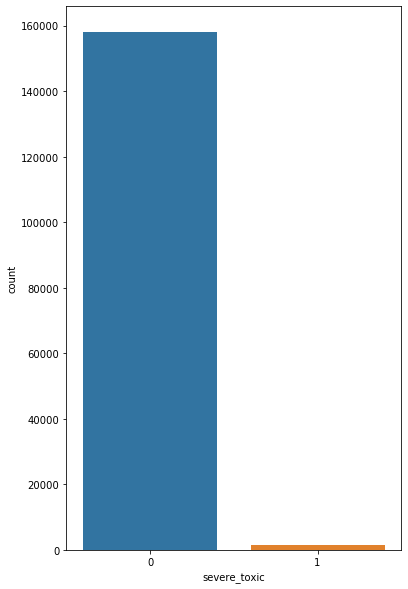

In [13]:
#severe toxic
plt.figure(figsize=(6, 10))
sns.countplot(data['severe_toxic'])

In [73]:
# #toxic
# plt.figure(figsize=(6, 10))
# sns.countplot(new_data['toxic'])

In [14]:

count = (data['toxic'] == 0).sum()
print("total toxic count: " ,count)

total toxic count:  144277


In [15]:
count = (data['toxic'] == 1).sum()
print("total toxic count: " ,count)

total toxic count:  15294


# UnderSampling Data

### Import Data

In [26]:
under_sampling = pd.read_csv('dataset/undersampling.csv')
under_sampling

Unnamed: 0                id  \
0               0  c436fcdd4acc928a   
1               1  17bb9f8b0e2ff008   
2               2  e86ae38d7ff0c1ff   
3               3  cb1fcb465bd93930   
4               4  140cb8dc1570e423   
...           ...               ...   
30583       30583  fef4cf7ba0012866   
30584       30584  ff39a2895fc3b40e   
30585       30585  ffa33d3122b599d6   
30586       30586  ffb47123b2d82762   
30587       30587  ffbdbb0483ed0841   

                                            comment_text  severe_toxic  \
0      naw i am fine see you later guys you rock ) ha...             0   
1              LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1             0   
2      You jumped the gun a bit too early - that's my...             0   
3                                No way, Mercedez PWNZ!!             0   
4      I noticed it doesn't mention if the real Presi...             0   
...                                                  ...           ...   
30583  "\n\n our previous conversation \n\nyou fuckin...             0   
30584                  YOU ARE A MISCHIEVIOUS PUBIC HAIR             0   
30585  Your absurd edits \n\nYour absurd edits on gre...             0   
30586  "\n\nHey listen don't you ever!!!! Delete my e...             0   
30587  and i'm going to keep posting the stuff u dele...             0   

       obscene  threat  insult  identity_hate  toxic  
0            0       0       0              0      0  
1            0       0       0              0      0  
2            0       0       0              0      0  
3            0       0       0              0      0  
4            0       0       0              0      0  
...        ...     ...     ...            ...    ...  
30583        1       0       1              1      1  
30584        0       0       1              0      1  
30585        1       0       1              0      1  
30586        0       0       1              0      1  
30587        1       0       1              0      1  

[30588 rows x 9 columns]

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


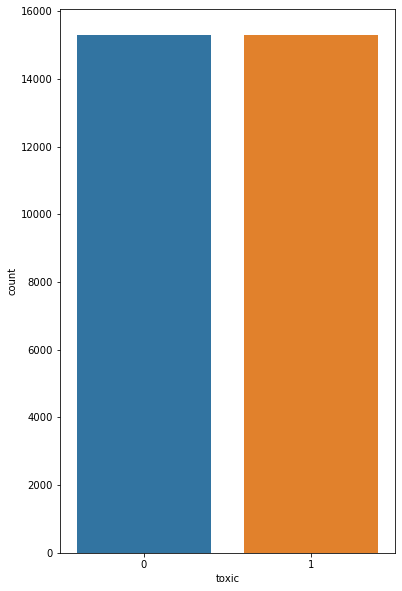

In [27]:
plt.figure(figsize=(6, 10))
sns.countplot(under_sampling['toxic'])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


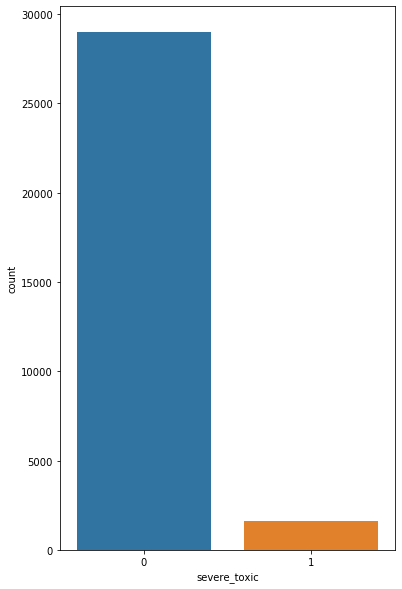

In [28]:
#severe toxic
plt.figure(figsize=(6, 10))
sns.countplot(under_sampling['severe_toxic'])

In [29]:
count = (under_sampling['toxic'] == 0).sum()
print("total non-toxic count: " ,count)

total non-toxic count:  15294


In [30]:
count = (under_sampling['toxic'] == 1).sum()
print("total toxic count: " ,count)

total toxic count:  15294


### Drop Columns

In [31]:
under_sampling = under_sampling.drop(['Unnamed: 0','obscene',"threat","insult",'identity_hate'], axis=1) 
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic  
0                 0      0  
1                 0      0  
2                 0      0  
3                 0      0  
4                 0      0  
...             ...    ...  
30583             0      1  
30584             0      1  
30585             0      1  
30586             0      1  
30587             0      1  

[30588 rows x 4 columns]

### Clean Data

In [11]:
# data7 = data.iloc[100000:120000]
# data7

id                                       comment_text  \
100000  173558f5c2a8883b  I think she meets Notability guidelines and th...   
100001  17359f940f219872  "\n\n Nice tavern article \n\nArticles like th...   
100002  173693e634e1a6cf  MfD nomination of User:Wikitrevor/Sandbox\n. Y...   
100003  17375e3fff2d9d1a  I am not speaking of sales. I am speaking of p...   
100004  173a0ca6d52dd01d  "\nG.S.K. Lee, what I intended to say is that ...   
...                  ...                                                ...   
119995  81a8ec8fae8901f7  "\n Readin, I could access the 2008 version pe...   
119996  81abdc8439f8e802      Here is a list of Surviving deposed monarchs.   
119997  81ad7f74886c0113  "\n Persistent spammers are blocked on a regul...   
119998  81afa5d4f805949a  Cecil Hunter Rodwell\nThanks for the tip.  The...   
119999  81b17baf2f0b3d45  I love Jesus Garcia because he saved my grandm...   

        toxic  severe_toxic  count  
100000      0             0    198  
100001      0             0    148  
100002      0             0    264  
100003      0             0    277  
100004      0             0    611  
...       ...           ...    ...  
119995      0             0    340  
119996      0             0     38  
119997      0             0     50  
119998      0             0    105  
119999      0             0     43  

[20000 rows x 5 columns]

#### Remove Username, Hashtags and Links 

In [32]:
cleanedText = []
linkRegex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
usernameRegex = r'@[^\s]+'
hashtagRegex = r'#[^\s]+'

for row in under_sampling['comment_text'].iteritems():

    x = row[-1]
    x = re.sub(linkRegex, '', x)
    x = re.sub(usernameRegex, '', x)
    x = re.sub(hashtagRegex, '', x)
    x = x.strip()
    cleanedText.append(x)

under_sampling['cleaned_text'] = cleanedText

In [33]:
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  naw i am fine see you later guys you rock ) ha...  
1                 0      0          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1  
2                 0      0  You jumped the gun a bit too early - that's my...  
3                 0      0                            No way, Mercedez PWNZ!!  
4                 0      0  I noticed it doesn't mention if the real Presi...  
...             ...    ...                                                ...  
30583             0      1  "\n\n our previous conversation \n\nyou fuckin...  
30584             0      1                  YOU ARE A MISCHIEVIOUS PUBIC HAIR  
30585             0      1  Your absurd edits \n\nYour absurd edits on gre...  
30586             0      1  "\n\nHey listen don't you ever!!!! Delete my e...  
30587             0      1  and i'm going to keep posting the stuff u dele...  

[30588 rows x 5 columns]

### Replace Acronym with full form words

In [34]:
replace_dict =  {
"ain't": "am not",
"ain’t": "am not",
"aren’t": "are not",
"aren't": "are not",
"bc": "because",
"can't": "cannot",
"can’t": "cannot",
"Can't":"cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn’t": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"didn’t": "did not",
"don’t": "do not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"how’s": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i’ll": "I will",
"i'll": "I will",
"i'll've": "I will have",
"i'll": "i will",
"i'm": "I am",
"im": "I am",
"i’m": "I am",
"i've": "I have",
"i’ve": "I have",  
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it’ll": "it will",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"it’s": "it is",
"I'm": "I am",
"i'm":"i am",
"It’s": "it is",
"It's": "it is",
"let's": "let us",
"irl":"in real life",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"d'aww"
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"That's": "that is",
"that’s": "that is",
"there'd": "there had",
"There’s": "there is",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"we’re": "we are",
"we’ve": "we have",
"weren't": "were not",
"whot":"what",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"here's": "here is",
"what’s": "what is",
"m00n":"moon",
"gt": "got",
"cuz": "because",
"coz":"because",
"bc": "because",
"rn": "right now",
"ima" : "i am a",
"pls": "please",
"alil": "a little",
"q's": "q",
"luv": "love",
"fwiw": "for what it is worth",
"francξ": "france",
"futurξ": "future",
"financξ" : "finance",
"founder's": "founder",
"secs": "seconds",
"r.i.p." : "rest in peace",
"tyvm": "thank you very much",
"u": 'you',
"kindof" : "kind of",
"wiki": "wikipedia",
"naw":'nope'
}

In [35]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]
    text = text.lower() #change to lower case
    text = " ".join(text.split()) #remove extra spaces in string
    test = text.split() #get indiv words to replace
    text = [replace_dict.get(w, w) for w in test] #replace common short forms
    text = " ".join(text)

    cleanedText.append(text)

under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope i am fine see you later guys you rock ) h...  
1                 0      0             lol reddit pwn you lmao. unknowntales1  
2                 0      0  you jumped the gun a bit too early - that is m...  
3                 0      0                            no way, mercedez pwnz!!  
4                 0      0  i noticed it does not mention if the real pres...  
...             ...    ...                                                ...  
30583             0      1  " our previous conversation you fucking shit e...  
30584             0      1                  you are a mischievious pubic hair  
30585             0      1  your absurd edits your absurd edits on great w...  
30586             0      1  " hey listen do not you ever!!!! delete my edi...  
30587             0      1  and i am going to keep posting the stuff you d...  

[30588 rows x 5 columns]

In [36]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]
    text = text.lower() #change to lower case
    text = " ".join(text.split()) #remove extra spaces in string
    test = text.split() #get indiv words to replace
    text = [replace_dict.get(w, w) for w in test] #replace common short forms
    text = " ".join(text)

    cleanedText.append(text)

under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope i am fine see you later guys you rock ) h...  
1                 0      0             lol reddit pwn you lmao. unknowntales1  
2                 0      0  you jumped the gun a bit too early - that is m...  
3                 0      0                            no way, mercedez pwnz!!  
4                 0      0  i noticed it does not mention if the real pres...  
...             ...    ...                                                ...  
30583             0      1  " our previous conversation you fucking shit e...  
30584             0      1                  you are a mischievious pubic hair  
30585             0      1  your absurd edits your absurd edits on great w...  
30586             0      1  " hey listen do not you ever!!!! delete my edi...  
30587             0      1  and i am going to keep posting the stuff you d...  

[30588 rows x 5 columns]

### Remove Stopwords, Abbv, Punctuations and Lemmatization and Tag POS

In [37]:
import re
import nltk
from nltk.corpus import wordnet
from wordcloud import WordCloud
nltk.download('stopwords')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# remove stopwords
def remove_stop_words(text):
    clean_text = []
    for word in text.split():
        if word.strip().lower() not in stop_words:
            clean_text.append(word)
            
    return " ".join(clean_text)

In [39]:
lemmatizer = nltk.WordNetLemmatizer()

In [40]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

Cleaning executed here

In [41]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]    
    text = re.sub("’s|'s", '', text) #remove pronoun
    text = re.sub('[^\w\s]','', text) #remove apostrophe
    text = re.sub('[^a-zA-Z]', ' ', text) #remove punctuation
    text = text.lower() #change to lower case
    text = remove_stop_words(text)
    text = " ".join(text.split()) #remove extra spaces in string


    
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    text = " ".join(lemmatized_sentence)

    cleanedText.append(text)
    
under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope fine see later guy rock hahahahaha userbi...  
1                 0      0                   lol reddit pwn lmao unknowntales  
2                 0      0               jump gun bit early first revert hour  
3                 0      0                                  way mercedez pwnz  
4                 0      0                 notice mention real president shot  
...             ...    ...                                                ...  
30583             0      1  previous conversation fuck shit eating liberal...  
30584             0      1                            mischievious pubic hair  
30585             0      1  absurd edits absurd edit great white shark tot...  
30586             0      1  hey listen ever delete edits ever annoy wwe k ...  
30587             0      1  go keep post stuff delete fuck site close fun ...  

[30588 rows x 5 columns]

In [42]:
for comments in under_sampling['cleaned_text']:
    print(comments)

nope fine see later guy rock hahahahaha userbig foot
lol reddit pwn lmao unknowntales
jump gun bit early first revert hour
way mercedez pwnz
notice mention real president shot
kyle dane john fredirick brennan bear december ohio america bear parent jennifer country music singer grant brennan two old sibling family move los angeles live late kyle parent decide change move sydney australia dane start school attend local public school family seem settle australia kyle father quit business kyle parent divorce mother live small suburb south sydney family home jennifer leave brother currantly reside late kyle prefers call dane interview nashville nancy regan small town reporter tennesse dane currently father comeback country music award interview dane confess got tease lot school kid make tough gay near nkow fact wrds dane use interview dane also state want go business like much good australia father family leave alone medium late dane relationship father sour father married alison brennan ha

list really need list telephone directory
altered photo actually look bad like tattoo remove laser treatment something match side face look though photo edit skill bad text never mind
may please stop continue introduce inappropriate page wikipedia block editing talk
debunk debunker john defrancis clearly poor understand chinese writtn language history chinese character originally represent idea earlier form vernacular chinese heavy phonological basis would enable speaker mutuall unintelligable language understand classical chinese enable speaker mutually unintelligible language read write ancient form phonetic ideographic script also old chinese language splinter many different chinese dalects today
teenager lieberman work nightclub bouncer moldavia come nightclub soviet union kid four five restaurant kishinev time closing time pm work short time nightclub beer sheva come israel worker lod airport way kishinev moldavia lieberman student agricultural institute agricultural university se

post may please sign post problem button lynx ii england tech team would constantly get high number return fix issue button lodge often tiny bit break end lodge lynx problem female power connector often resoldered back onto board become loose two main problem first lynx certainly solid durable time return fix power socket also
dare considerate polite pound keyboard inability stop trail destruction
status formal closure request ball admins court unusual take week get response unusual take month give importance level complexity two thread surprise extend dnau another stretch keep update checking closure request thread wpanrfc
someone keep delete reason undertakergreat khali match cancel
echo blackngold comment thank determination make wikipedia entry nfl player look professional possible sport related entry always cut behind article speak go change need get little thing right
hi moderator hate speech allow discussion page editor like go trace back see whether indeed expression racism nee

accepted linux codingstyle file mandate minor variation specialcasing function decently common though space within line indent seldom strictly enforce
hm amaze even notice wrong acronym tizzle
please stop continue vandalize wikipedia block edit talk
story think need story headline come gameplay headline
read rex alexander comment
add info could do ten minute research also remove claim michael live romania doesnt live geneva although make regular appearance romania see semiofficial website
look like personal essay kind talk
right prohibit call others munafiq case right look difference contribution gorgecusterssabre one simple understand would mumin would munafiq talk
certainly see wpnpa specifically sentence derogatory comment another contributor may remove editor totally line repeat personal attack warn follow rule
gon na go around circle wrong already take time explain prove stubborn bias tired form jehovah longestablished widelyused fringe group keep move goal post name provide say t

support develop uprise much blood spill folk oppose name change call war report cnn people kill monday discus syrian arm force army republican guard etc trading hot round lead free syrian army also neighborhood shelled sniper continue hunt activist like animal read yahoo news soldier syrian army proassad kill many wound day others antiassad kill therefore clear become constant exchange gunfire violence overall think either call civil war perhaps revolution quite clear least uprising syria war zone month violence range small domestic disurbances riot people kill united state decides close embassy get diplomat country earlier another sign thing get bad believe united state enough intelligence country know go war start time us get americans country harm way
please explain please explain category belong page know anything subject
new addition acsh criticism source rebuttal pcrm website seem like thing try way hard find way insert specialinterest fight page dispute factual correctness group

misunderstood please read message talk page carefully top follow instruction block three hour time may still edit page thank talk
mention lack consensus say unreferenced claim must remove described wpcite disagrees nobody consensus reach revert edits
samuel luo yueyuen kent mr could naive
hdh song list hdh song list two michael jackson song really hdh song lamont dozy already split yearandahalf earler include five new supremes single write holland brother also include say best
action josef stalin say action josef stalin show misundersdanding wikipedia policy block user point view clearly violate wp rule please support vandalism mass revertions
section need edit line new hampshire accurate january first time martin luther king day officially observe state prior new hampshire arizona observe day fact new hampshire pass civil right day honor dr king civil right activist like rosa park malcolm x since article state clearly state utah different name holiday include combine confederate milit

asimova hi ymblanter know edit article kazakhstan criterias appropriate wikipedia one delete article losted hope wikipedia start new article kazakhstan allow please help improve article kazakhstan without delete
feminism task force hello notice feminist userbox userpage think might interested check add name participant interested nice day happy editing
february utc thanks message ab
creepy stalk gabey roflmfao
cheer talk contribs
edit car accident thank experiment wikipedia test work revert removed please use sandbox test may want take look welcome page learn contribute encyclopedia
blah blah blah every edit ever make related paranormal mate martinphi edit wide range topic always do john edward article come always edit anonymously edit count award hunter get tell admin sign various reason mainly university lecture lease line vandalism do via share ip address previously edward debacle contribute largely articles moroccan culture indian culture popular music since start edit edward find 

hi page delete
number parentheses additional decimal point measure lie outside accuracy measurement process mean value parenthesis eg could use purpose calculation value result calculation would accurate number significant figure parenthesis consider word value parenthesis help avoid round error youre try work limit accuracy gas constant agree commonly know confuses issue would recommend remove
attitude check m martin mr sidaway like bully belittle far long go stop single handedly necessary deplorable attitude please come back unless actually want work improve encyclopedia instead perpetrate personal vendetta
help list sockpuppet case hi create afternoon see list active case could add proper place please thanks rjaguar
npov apply page
proof find list claim hijacker proof hijacker plane
think keep current title base reason give talk
hello stop someone else block user viewfinder pretend user mikara
sp mein kampf one moment hitler laud social democratic party mind friedrich austerlitz ant

believe tinkleheimer part appreciate talk like child someone know know interpret scorp say condescend arrogant exactly see raise point try makewere work together least try need level civility like say part problem past show least qst instance willing civil least show humility even though like tone post scorp want go deal go want coexist need start act civil stop talk even consider
eunuch question leave choice reinsert take action see fitsnun w
real life barnstar great work possibly save life today rcmp grateful get info
welcome hello welcome wikipedia thank contribution currently edit without username continue require log wikipedia read edit article however log result username show instead ip address log require personal detail many benefit log edit page please respect others copyright copy paste content webpages directly please use neutral point view edit article possibly important wikipedia policy test please use sandbox add unreasonable content article copyright text advertisement m

remove talk ive never actually heard term king pop probably make tabloid paper
record include proper source every statement add proper reference mainstream websites action take hipocrite seem rather spurious
edit actually like compounded bad point remain bang price twice rate inflation
qualify tyled great admirer apr utc
collin wilcox actress
archive discussion talk page pretty hard follow cover several year archive
templateuwvandalism
someone suppose create eric verbin protect could publicist would make difference dont delete
redirect wikipedia talkwikiproject usabilitymain pagedraft
truly inspire apology
love begin like introduction go conclusion thrash self decade make summary begininngs summary postthrash etc main article thrash metal throw idea
problem year donate substantial amount money project regular basis however treatment receive schumin subsequent ignorance cause stop payment want reform wikipedia way run reason block check edit history johnjoe insult schumin tell truth cal

tripe northern irish perfectly adequate see take away anyones right anything one describe northern irish british likwise one describe northern irish irish could describe northern irish british irish depend context
roman army think roman army infobox could bite sprucing consistent article propose follow change article state reliable source senate bring eight roman legion strength men plus roman cavalry legion number ally troops plus allied cavalry mean infobox read something like roman infantry ally infantry roman cavalry ally cavalry could read something like roman troop ally troop
strong feeling either way split early history section geog politics wildlife section good wildlife probably rename flora fauna see south africa australia shorten make broad scope full length version wildlife could go separate article fauna drc flora drc
would like involved editor one block
umm geologist sure someone could work two link article doubt could work one p imagine swore
argh pretty unpleasant go se

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



pompous fool
booby booby booby
would also support view clearly think clever dick let hope big mouth teach big lesson
tut tut think say goodbyeee au revoir call leave crap fear popeyed little pooch point well take hardly need remind give fly fart stick fact veracity although free lowlevel sharts notice happily though others second thought keep sectionto exhibit appreciation visitor fully housetrained remarkable specimen produce little doggie friend shall call little mexican doggy whopper change story hour third time eh fourth fifth seem lose count approach limit pitifully deficient arithmetic er comprehend correctly late draft hour originally think five hour two hour interest reveal fact sniffily dismiss interval less hour emph interest revealing openended tends support story innocent estimate less doesnt less specifically limited narrow focus specific clearly calculated pun intend lie wellknown liar trouble remember lie tell less wellknown fact use word trivial though word seem often g

dosh bag dont mess watch worth car know whats good shut way chick fucker
dick know make test edit anything even slightly like fuck
least fix least fix title christ sake brand extension title make sense talk event beg watch product pguniverse era never say onscreen ruthless aggression era reality era clearly real one day see documentary network guarantee list watch stone cold podcast triple h last monday least one confirmation ignorant narrow head mind
noteif ya aint dutch ya aint much
alitalia remove rom alliance due pisspoor customer service sentiment nummerous flyertalkers
one pint feces faaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaace
phuck justice wikipedia thugocracy call task nuclear warfare
people absolute fuck moron say find source find good enough prove matter would even possible whatever people like people bother edit wikipedia grow brain
yeah well call horse jackass would indeed insult call jackass jackass merely accurate comment stop respond guide issue almost amuse consider time tim

hey asshole year old briefing state change useranonymous
hell woah edit
angry billj get people block long live ask stop delete edits block eon asshole wikipedia censor stop remove fucking message beat silly
oh god much vandalism
ark thompson fuck delete thisi need fuck research story fuck douchewho ever
wan na suck jdealony dick schnitzelmangreek dickyou dick account khan schnitzelhellenic penguin army mordor keep blacklist creation
enough brain look edits see fool like falsely changin klr klt others correct resurrection ad community split many people take much proof get last time community split kazaa lite resurrection ad klt never ad never allegation klt ad proof change klr klt change whole dynamic discussion
hate everyone especially lols
rm offensive jibber jabber
leave fcking page way edit as
peacemaker evil must revert edits ever dispute anybody use excuse personal vendetta totally pathetic pity little man
fuck call talk fuck talk page vandalism revert get say whole fucking busine

oh crap guy
america suck thanks restrict freedom speech dirty red us marine fought country would roll graf make sick simply make page britain good america list valid clearly logical point dishearten see wikipedia support restrict freedom speech go beliefs information everyone country compare country germany hitler rise power country fill scum earth tell make page difference british american english talk page vandalism commie pig iraq anyone
give shit dispute anyone give shit fuck even get tie ggtf troll beyond tried give wikipedia drama apparently carol magnet drama still human much improve wikipedia many choose spend much time nonspace high school cafeteria instead library essentially hasspoken
sockpuppet whose sockpuppet
push pov always use sikandarji name fact absuing name nonsense contradict reject nonsense many time check talkhephthalite page reject nonsense mughals turk check talktimurids deffinitly push turkish nationalist pov recent edits clear proof fact actively remove schola

dude huge loser god man loser get life dude der twenty something degree computer make qualified spend time edit wikipedia crap block people make feel powerful reality huge fat fuck loser look medal feel though really help change world take bullet get purple medal something real life least get one away computer
oi mark arsten donkey rap shit eater grossly insult degrade offensive material knob grow
warn man piss article create fucking day go perfect shut fuck know shit code lyoko see leave fuck alone admin notify
ben gaelys gay ben gaelys gay
dmacks fuck faggot hear faggot
nerd fuck nerd take look mirror
important spit swallow
fisto retard nigger
jeff g faggot well j delanoy suck others cock gurgle aid infect semen passionately smug nigger love liberal jewbags
fuck inch weiner
tell truth course piece garbage care actually life loser
discriminate english people black
fuck wikipedia doosh bag
gay leader yamla gay nigger saturn jupiter hail name wide butt size city paris
dead nice one dude

wowfunny harass user call cocksucker talk page concept wikipedia moronicthe general public stupid give complete unfettered access change globally accessible content dumb fuck sure completely get little shriveled rock fling term vandalism around like worth anything sit huge cock egotistical power hungry nerd shit eat fagot abuse fuck idiots ban stupid fuck idiot dipshits
tempt show picture four head penis
block editor still insist block user reason editor go take little twerp peg two give little idiot taste medicine dmacks able block account
dont use space dumbass
see also maggot usergofuckyourself
pontificalibus full shit
warn tell block
nawit persistent aholes fascists btw sock puppet
wicked person wicked demon rebuke name yehovah god name yeshuwa hamashiach son holy breath
billcj bitch main page still survivor infor kid seem evertime try delete redundent information see b others get replace givenup change
thruth vandalize page test see edit create page work previous page delete wikip

absolute proof equal mathwiki wrong infinite representation ancient greek never represent let refute argument regard transitive property b c problem occur b assume prove anything contrary prove assume obviously equal indeterminate number can not represent finitely base equal can not say finite representation indeterminate number number repeat radix system mention division algorithm know say division algorithm nothing radix system let state b two give integer unique integer q r abq r r b use division algorithm prove wrong suppose b integer q r true suppose q r division algorithm fail make false statement ie q r respectively example default division algorithm prove false equal say lot thing greek would make stupid mistake like smart race ancient time suppose try tell either form acceptable case still end terrible contradiction second form case implies since r b less want world know fg idiot run site bunch retard conceited fool look upon utmost hatred condemnation site absolute crap run f

dick big antijapanese dick know think give indefinite ban get indefinite ban
bullshit hate
mom monkey butt suck monkey butt bitch
shat somethin mornin prettier hope get flushed toilet belong
newsflash th yea he prety gay toss gay never sex except men anus sphenctar
blargh blargh blargh eat
please go check instagram dumb as live tampa engage souray retard
imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball imagescrotumjpgsuck ball
fuck piece shit
or

base chriso behavior load bull pretexting attack never give warn blocked warning respond abusive jerk place question interpretation rule flatly refuse respond
hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat
stop post warnign talk page fucking gay shit dont give fuck jesus chirst
lestrade obviously mentally disturbed
list political slur almost lack cojones guess wish quick way get second admin opinion 

### Count number of words in each comment after cleaning

In [43]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words))

under_sampling['count'] =under_sampling['cleaned_text'].apply(lambda x: avg_word(x))
under_sampling.head()

id                                       comment_text  \
0  c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1  17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2  e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3  cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4  140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   

   severe_toxic  toxic                                       cleaned_text  \
0             0      0  nope fine see later guy rock hahahahaha userbi...   
1             0      0                   lol reddit pwn lmao unknowntales   
2             0      0               jump gun bit early first revert hour   
3             0      0                                  way mercedez pwnz   
4             0      0                 notice mention real president shot   

   count  
0     44  
1     28  
2     30  
3     15  
4     30

In [44]:
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  \
0                 0      0  nope fine see later guy rock hahahahaha userbi...   
1                 0      0                   lol reddit pwn lmao unknowntales   
2                 0      0               jump gun bit early first revert hour   
3                 0      0                                  way mercedez pwnz   
4                 0      0                 notice mention real president shot   
...             ...    ...                                                ...   
30583             0      1  previous conversation fuck shit eating liberal...   
30584             0      1                            mischievious pubic hair   
30585             0      1  absurd edits absurd edit great white shark tot...   
30586             0      1  hey listen ever delete edits ever annoy wwe k ...   
30587             0      1  go keep post stuff delete fuck site close fun ...   

       count  
0         44  
1         28  
2         30  
3         15  
4         30  
...      ...  
30583    804  
30584     21  
30585    178  
30586    213  
30587     91  

[30588 rows x 6 columns]

### Save to CSV

In [45]:
under_sampling.to_csv("dataset/cleaned_30kundersampling.csv" ,index=False)

In [46]:
under_sampling.reset_index()

index                id  \
0          0  c436fcdd4acc928a   
1          1  17bb9f8b0e2ff008   
2          2  e86ae38d7ff0c1ff   
3          3  cb1fcb465bd93930   
4          4  140cb8dc1570e423   
...      ...               ...   
30583  30583  fef4cf7ba0012866   
30584  30584  ff39a2895fc3b40e   
30585  30585  ffa33d3122b599d6   
30586  30586  ffb47123b2d82762   
30587  30587  ffbdbb0483ed0841   

                                            comment_text  severe_toxic  toxic  \
0      naw i am fine see you later guys you rock ) ha...             0      0   
1              LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1             0      0   
2      You jumped the gun a bit too early - that's my...             0      0   
3                                No way, Mercedez PWNZ!!             0      0   
4      I noticed it doesn't mention if the real Presi...             0      0   
...                                                  ...           ...    ...   
30583  "\n\n our previous conversation \n\nyou fuckin...             0      1   
30584                  YOU ARE A MISCHIEVIOUS PUBIC HAIR             0      1   
30585  Your absurd edits \n\nYour absurd edits on gre...             0      1   
30586  "\n\nHey listen don't you ever!!!! Delete my e...             0      1   
30587  and i'm going to keep posting the stuff u dele...             0      1   

                                            cleaned_text  count  
0      nope fine see later guy rock hahahahaha userbi...     44  
1                       lol reddit pwn lmao unknowntales     28  
2                   jump gun bit early first revert hour     30  
3                                      way mercedez pwnz     15  
4                     notice mention real president shot     30  
...                                                  ...    ...  
30583  previous conversation fuck shit eating liberal...    804  
30584                            mischievious pubic hair     21  
30585  absurd edits absurd edit great white shark tot...    178  
30586  hey listen ever delete edits ever annoy wwe k ...    213  
30587  go keep post stuff delete fuck site close fun ...     91  

[30588 rows x 7 columns]

In [47]:
under_sampling.reset_index(inplace = True, drop = True)
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  \
0                 0      0  nope fine see later guy rock hahahahaha userbi...   
1                 0      0                   lol reddit pwn lmao unknowntales   
2                 0      0               jump gun bit early first revert hour   
3                 0      0                                  way mercedez pwnz   
4                 0      0                 notice mention real president shot   
...             ...    ...                                                ...   
30583             0      1  previous conversation fuck shit eating liberal...   
30584             0      1                            mischievious pubic hair   
30585             0      1  absurd edits absurd edit great white shark tot...   
30586             0      1  hey listen ever delete edits ever annoy wwe k ...   
30587             0      1  go keep post stuff delete fuck site close fun ...   

       count  
0         44  
1         28  
2         30  
3         15  
4         30  
...      ...  
30583    804  
30584     21  
30585    178  
30586    213  
30587     91  

[30588 rows x 6 columns]

In [48]:
under_sampling.to_csv("dataset/cleaned_30kundersampling.csv")

### Count word that occured 

In [49]:
# Count of articles by Year
under_sampling["cleaned_text"].apply(lambda x: (str(x)[:4])).value_counts()

fuck    913
than    454
hey     452
plea    443
hell    301
       ... 
enca      1
lake      1
redh      1
ryuk      1
p mi      1
Name: cleaned_text, Length: 5016, dtype: int64

### Popular Words used in Non-Toxic Comments using Word Cloud

In [58]:
from wordcloud import WordCloud, STOPWORDS

stop_words = stopwords.words('english')

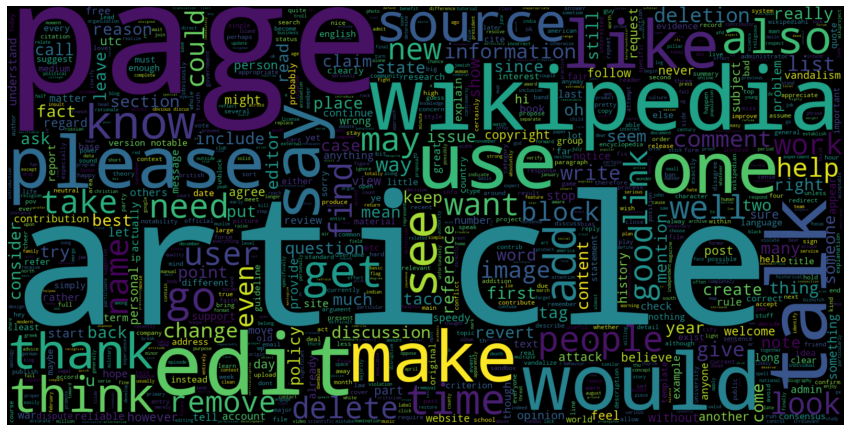

In [68]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 ,collocations=False,   stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["toxic"] == 0].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

### Popular Words used in Moderately Toxic Comments using Word Cloud

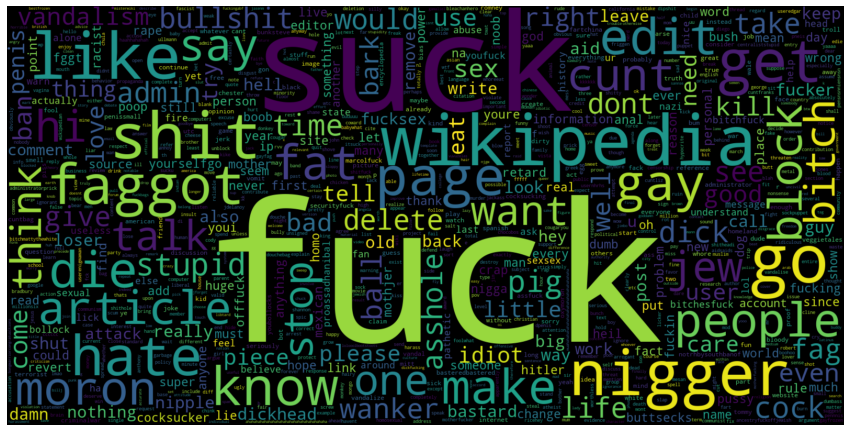

In [67]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , collocations=False,  stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["toxic"] == 1].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

### Popular Words used in Severe Toxic Comments using Word Cloud

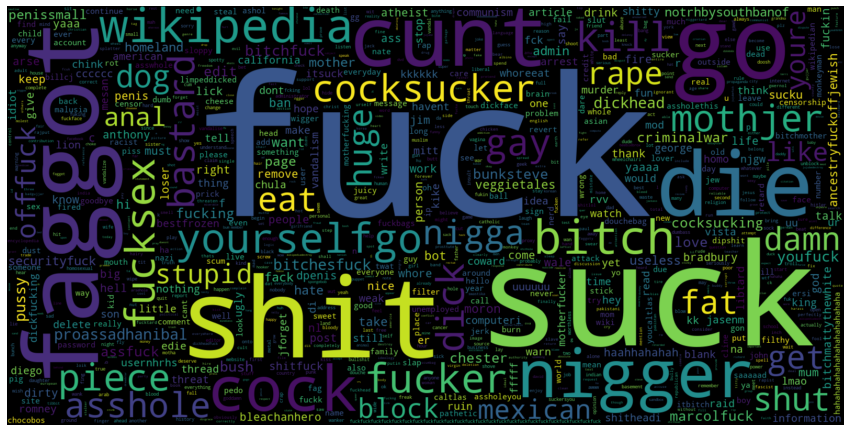

In [66]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , collocations=False, stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["severe_toxic"] == 1].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
#collations = false means don't repeat same words

### Frequency of Words used in Non-Toxic

In [69]:
from collections import Counter

In [77]:
#only show top 10
non_toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["toxic"] == 0].cleaned_text))[0].split()

counter = Counter(non_toxic_corpus)
non_toxic_common = counter.most_common(10)
non_toxic_common = dict(non_toxic_common)
non_toxic_common_df = pd.DataFrame(non_toxic_common.items(), columns = ["words", "count"])
non_toxic_common_df.set_index("words")

count
words           
article     7507
page        5601
wikipedia   4002
talk        3497
would       3276
use         3266
edit        3056
please      3036
one         3028
make        2912

<function matplotlib.pyplot.show(*args, **kw)>

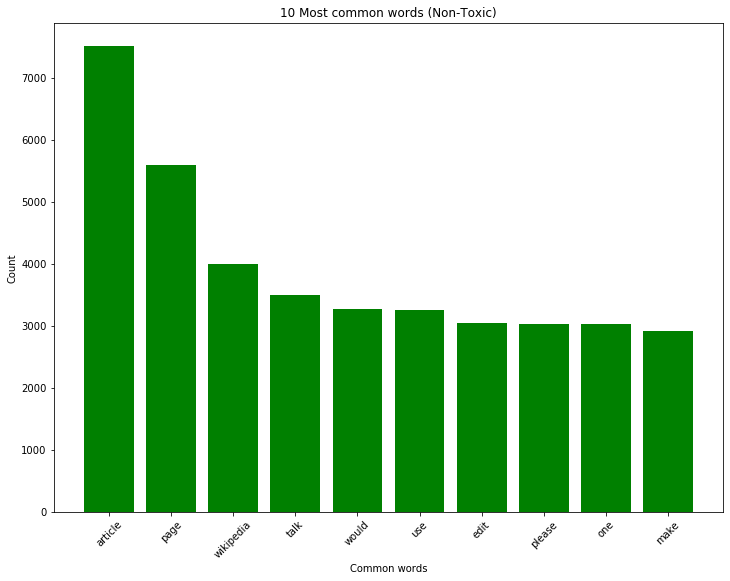

In [82]:
plt.figure(figsize=(12,9))
plt.bar(non_toxic_common.keys(), non_toxic_common.values(), color="Green")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Non-Toxic)")
plt.show

### Frequency of Words used in Toxic

In [75]:
#only show top 10
toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["toxic"] == 1].cleaned_text))[0].split()

counter = Counter(toxic_corpus)
toxic_common = counter.most_common(10)
toxic_common = dict(toxic_common)
toxic_common_df = pd.DataFrame(toxic_common.items(), columns = ["words", "count"])
toxic_common_df.set_index("words")

count
words           
fuck       11442
suck        4589
wikipedia   4373
go          4089
like        3621
shit        3617
nigger      3417
get         3143
hate        2639
page        2555

<function matplotlib.pyplot.show(*args, **kw)>

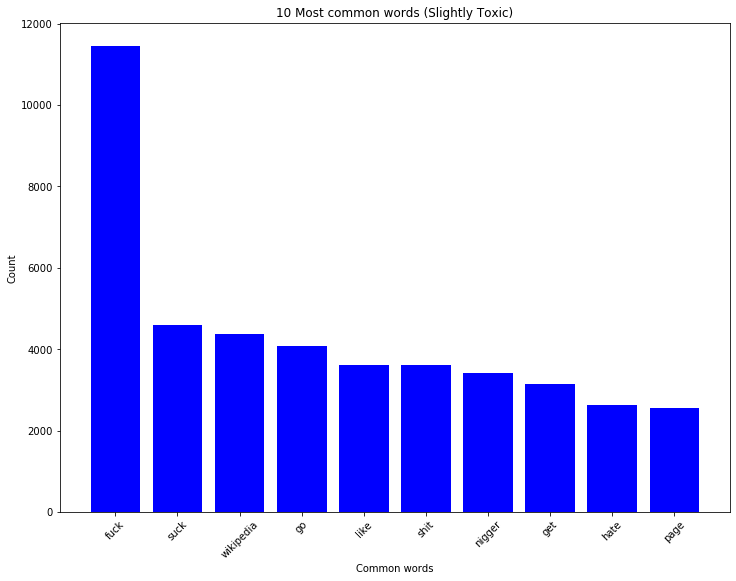

In [84]:
plt.figure(figsize=(12,9))
plt.bar(toxic_common.keys(), toxic_common.values(), color="Blue")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Slightly Toxic)")
plt.show

### Frequency of Words used in Severely Toxic

In [86]:
#only show top 10
sev_toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["severe_toxic"] == 1].cleaned_text))[0].split()

counter = Counter(sev_toxic_corpus)
sev_toxic_common = counter.most_common(10)
sev_toxic_common = dict(sev_toxic_common)
sev_toxic_common_df = pd.DataFrame(sev_toxic_common.items(), columns = ["words", "count"])
sev_toxic_common_df.set_index("words")

count
words        
fuck     7188
suck     3324
shit     1883
as       1706
faggot   1576
go       1524
die      1159
cunt     1037
nigger   1017
cock      913

<function matplotlib.pyplot.show(*args, **kw)>

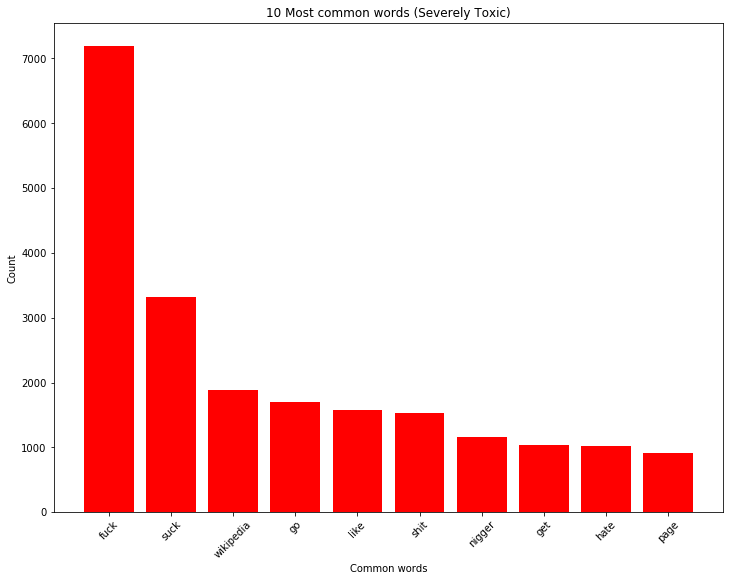

In [87]:
plt.figure(figsize=(12,9))
plt.bar(toxic_common.keys(), sev_toxic_common.values(), color="Red")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Severely Toxic)")
plt.show